In [1]:
import zipfile
# Unzip the downloaded file
zip_ref = zipfile.ZipFile("/Users/dk/Downloads/pizza_steak.zip", "r")
zip_ref.extractall()
zip_ref.close()

In [2]:
!ls pizza_steak

test  train


In [3]:
!ls pizza_steak/train/

pizza steak


In [4]:
!ls pizza_steak/train/steak/

1000205.jpg 1647351.jpg 2238681.jpg 2824680.jpg 3375959.jpg 417368.jpg
100135.jpg  1650002.jpg 2238802.jpg 2825100.jpg 3381560.jpg 4176.jpg
101312.jpg  165639.jpg  2254705.jpg 2826987.jpg 3382936.jpg 42125.jpg
1021458.jpg 1658186.jpg 225990.jpg  2832499.jpg 3386119.jpg 421476.jpg
1032846.jpg 1658443.jpg 2260231.jpg 2832960.jpg 3388717.jpg 421561.jpg
10380.jpg   165964.jpg  2268692.jpg 285045.jpg  3389138.jpg 438871.jpg
1049459.jpg 167069.jpg  2271133.jpg 285147.jpg  3393547.jpg 43924.jpg
1053665.jpg 1675632.jpg 227576.jpg  2855315.jpg 3393688.jpg 440188.jpg
1068516.jpg 1678108.jpg 2283057.jpg 2856066.jpg 3396589.jpg 442757.jpg
1068975.jpg 168006.jpg  2286639.jpg 2859933.jpg 339891.jpg  443210.jpg
1081258.jpg 1682496.jpg 2287136.jpg 286219.jpg  3417789.jpg 444064.jpg
1090122.jpg 1684438.jpg 2291292.jpg 2862562.jpg 3425047.jpg 444709.jpg
1093966.jpg 168775.jpg  229323.jpg  2865730.jpg 3434983.jpg 447557.jpg
1098844.jpg 1697339.jpg 2300534.jpg 2878151.jpg 3435358.jpg 461187.jpg
1100074.jp

In [5]:
import os

# Walk through pizza_steak directory and list number of files
for dirpath, dirnames, filenames in os.walk("pizza_steak"):
  print(f"There are {len(dirnames)} directories and {len(filenames)} images in '{dirpath}'.")

There are 2 directories and 0 images in 'pizza_steak'.
There are 2 directories and 0 images in 'pizza_steak/test'.
There are 0 directories and 250 images in 'pizza_steak/test/steak'.
There are 0 directories and 250 images in 'pizza_steak/test/pizza'.
There are 2 directories and 0 images in 'pizza_steak/train'.
There are 0 directories and 750 images in 'pizza_steak/train/steak'.
There are 0 directories and 750 images in 'pizza_steak/train/pizza'.


In [6]:
# Get the class names (programmatically, this is much more helpful with a longer list of classes)
import pathlib
import numpy as np
data_dir = pathlib.Path("pizza_steak/train/") # turn our training path into a Python path
class_names = np.array(sorted([item.name for item in data_dir.glob('*')])) # created a list of class_names from the subdirectories
class_names

array(['pizza', 'steak'], dtype='<U5')

In [7]:
# View an image
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import random

def view_random_image(target_class):
  # Setup target directory (we'll view images from here)
  target_folder = "pizza_steak/train/"+target_class

  # Get a random image path
  random_image = random.sample(os.listdir(target_folder), 1)

  # Read in the image and plot it using matplotlib
  img = mpimg.imread(target_folder + "/" + random_image[0])
  plt.imshow(img)
  plt.title(target_class)
  plt.axis("off");
    
  print(f"Image shape: {img.shape}") # show the shape of the image

Image shape: (512, 512, 3)


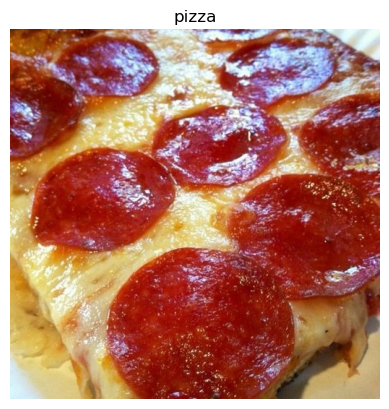

In [8]:
view_random_image("pizza")

Image shape: (512, 512, 3)


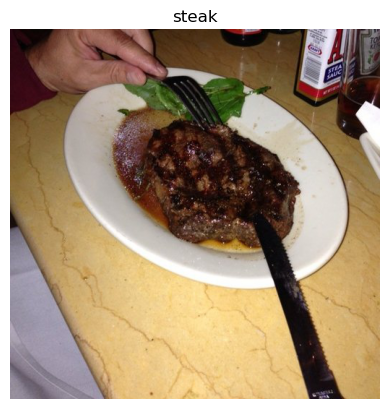

In [9]:
view_random_image("steak")

#### Pre-processing

In [10]:
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# Set the seed
tf.random.set_seed(42)

# Preprocess data (get all of the pixel values between 1 and 0, also called scaling/normalization)
train_datagen = ImageDataGenerator(rescale=1./255)
valid_datagen = ImageDataGenerator(rescale=1./255)

# Setup the train and test directories
train_dir = "pizza_steak/train/"
test_dir = "pizza_steak/test/"

# Import data from directories and turn it into batches
train_data = train_datagen.flow_from_directory(train_dir,
                                               batch_size=32, # number of images to process at a time 
                                               target_size=(224, 224), # convert all images to be 224 x 224
                                               class_mode="binary", # type of problem we're working on
                                               seed=42)

valid_data = valid_datagen.flow_from_directory(test_dir,
                                               batch_size=32,
                                               target_size=(224, 224),
                                               class_mode="binary",
                                               seed=42)

Found 1500 images belonging to 2 classes.
Found 500 images belonging to 2 classes.


#### Tiny VGG


In [11]:
import warnings
warnings.filterwarnings('ignore')

In [12]:
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Conv2D,MaxPool2D,Dense,Flatten
from tensorflow.keras.callbacks import EarlyStopping
# tiny VGG 
def tiny_vgg():
    FILTERS = 10
    model = Sequential([
    Conv2D(filters=FILTERS,kernel_size =(3,3),activation="relu",input_shape=(224,224,3),name='conv_1_1'),
    Conv2D(filters=FILTERS,kernel_size =(3,3),activation="relu",name='conv_1_2'),
    MaxPool2D((2, 2), name='max_pool_1',padding="valid"),

    Conv2D(filters=FILTERS,kernel_size =(3,3),activation="relu",name='conv_2_1'),
    Conv2D(filters=FILTERS,kernel_size =(3,3),activation="relu",name='conv_2_2'),
    MaxPool2D((2, 2), name='max_pool_2'),

    Flatten(name='flatten'),
    Dense(1, activation='sigmoid', name='output')
    ])
    return model;


In [13]:
# crete the model 
model_one = tiny_vgg()
# Compile the model
model_one.compile(loss="binary_crossentropy",
              optimizer="adam",
              metrics=["accuracy"])
history_one = model_one.fit(train_data,
                        epochs=5,
                        steps_per_epoch=len(train_data),
                        validation_data=valid_data,
                        validation_steps=len(valid_data))

Epoch 1/5


2023-12-09 23:46:09.150459: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_0' with dtype int32
	 [[{{node Placeholder/_0}}]]
2023-12-09 23:46:09.182636: W tensorflow/tsl/platform/profile_utils/cpu_utils.cc:128] Failed to get CPU frequency: 0 Hz


47/47 [==============================] - ETA: 0s - loss: 0.6550 - accuracy: 0.5700

2023-12-09 23:46:23.554874: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_0' with dtype int32
	 [[{{node Placeholder/_0}}]]


47/47 [==============================] - 16s 345ms/step - loss: 0.6550 - accuracy: 0.5700 - val_loss: 0.4460 - val_accuracy: 0.8160
Epoch 2/5
47/47 [==============================] - 16s 337ms/step - loss: 0.4613 - accuracy: 0.7940 - val_loss: 0.3689 - val_accuracy: 0.8760
Epoch 3/5
47/47 [==============================] - 16s 341ms/step - loss: 0.4226 - accuracy: 0.8113 - val_loss: 0.3365 - val_accuracy: 0.8740
Epoch 4/5
47/47 [==============================] - 16s 340ms/step - loss: 0.3772 - accuracy: 0.8393 - val_loss: 0.3316 - val_accuracy: 0.8760
Epoch 5/5
47/47 [==============================] - 17s 351ms/step - loss: 0.3454 - accuracy: 0.8553 - val_loss: 0.2975 - val_accuracy: 0.8760


In [14]:
import pandas as pd
pd.DataFrame(history_one.history)

,loss,accuracy,val_loss,val_accuracy
0,0.654988,0.570000,0.445981,0.816
1,0.461312,0.794000,0.368925,0.876
2,0.422596,0.811333,0.336456,0.874
3,0.377243,0.839333,0.331565,0.876
4,0.345386,0.855333,0.297491,0.876


<Axes: >

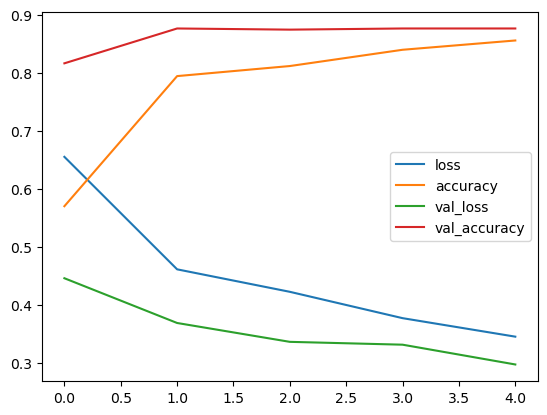

In [15]:
pd.DataFrame(history_one.history).plot()

In [16]:
# Check out the layers in our model
model_one.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv_1_1 (Conv2D)           (None, 222, 222, 10)      280       
                                                                 
 conv_1_2 (Conv2D)           (None, 220, 220, 10)      910       
                                                                 
 max_pool_1 (MaxPooling2D)   (None, 110, 110, 10)      0         
                                                                 
 conv_2_1 (Conv2D)           (None, 108, 108, 10)      910       
                                                                 
 conv_2_2 (Conv2D)           (None, 106, 106, 10)      910       
                                                                 
 max_pool_2 (MaxPooling2D)   (None, 53, 53, 10)        0         
                                                                 
 flatten (Flatten)           (None, 28090)             0

##### Early stopping

In [17]:
 # crete the model 
model_two = tiny_vgg()
# Compile the model
model_two.compile(loss="binary_crossentropy",
              optimizer="adam",
              metrics=["accuracy"])

callback = EarlyStopping(monitor='val_loss', patience=1)
# Fit the model
history_two = model_two.fit(train_data,
                        epochs=5,
                        callbacks=[callback],
                        steps_per_epoch=len(train_data),
                        validation_data=valid_data,
                        validation_steps=len(valid_data))

Epoch 1/5


2023-12-09 23:47:30.496822: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_0' with dtype int32
	 [[{{node Placeholder/_0}}]]


47/47 [==============================] - ETA: 0s - loss: 0.7175 - accuracy: 0.6240

2023-12-09 23:47:45.191611: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_0' with dtype int32
	 [[{{node Placeholder/_0}}]]


47/47 [==============================] - 17s 354ms/step - loss: 0.7175 - accuracy: 0.6240 - val_loss: 0.4917 - val_accuracy: 0.7880
Epoch 2/5
47/47 [==============================] - 17s 356ms/step - loss: 0.4653 - accuracy: 0.7887 - val_loss: 0.4276 - val_accuracy: 0.7880
Epoch 3/5
47/47 [==============================] - 17s 357ms/step - loss: 0.4344 - accuracy: 0.8027 - val_loss: 0.3576 - val_accuracy: 0.8620
Epoch 4/5
47/47 [==============================] - 17s 358ms/step - loss: 0.4265 - accuracy: 0.8147 - val_loss: 0.4010 - val_accuracy: 0.8480


In [18]:
pd.DataFrame(history_two.history)

,loss,accuracy,val_loss,val_accuracy
0,0.717476,0.624000,0.491724,0.788
1,0.465288,0.788667,0.427610,0.788
2,0.434438,0.802667,0.357649,0.862
3,0.426546,0.814667,0.401004,0.848


<Axes: >

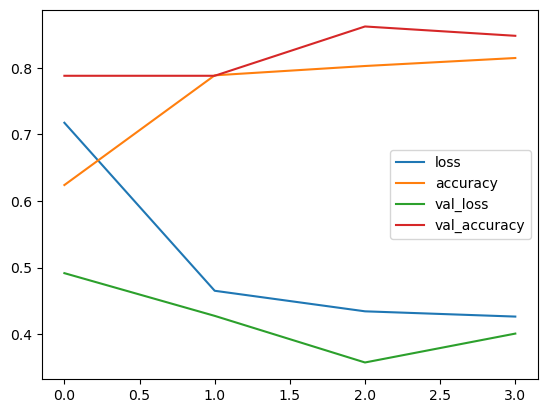

In [19]:
pd.DataFrame(history_two.history).plot()

#### VGG16

In [20]:
from tensorflow.keras.layers import Input
from tensorflow.keras import Model

In [21]:
def vgg_16():
    input = Input(shape=(224,224,3))

    x = Conv2D(filters=64,kernel_size=(3,3),padding="same",activation="relu")(input)
    x = Conv2D(filters=64,kernel_size=(3,3),padding="same",activation="relu")(x)
    x = MaxPool2D(pool_size=(2,2),strides=(2,2),padding="same")(x)

    x = Conv2D(filters=128,kernel_size=(3,3),padding="same",activation="relu")(x)
    x = Conv2D(filters=128,kernel_size=(3,3),padding="same",activation="relu")(x)
    x = MaxPool2D(pool_size=(2,2),strides=(2,2),padding="same")(x)

    x = Conv2D(filters=256,kernel_size=(3,3),padding="same",activation="relu")(x)
    x = Conv2D(filters=256,kernel_size=(3,3),padding="same",activation="relu")(x)
    x = MaxPool2D(pool_size=(2,2),strides=(2,2),padding="same")(x)

    x = Conv2D(filters=512,kernel_size=(3,3),padding="same",activation="relu")(x)
    x = Conv2D(filters=512,kernel_size=(3,3),padding="same",activation="relu")(x)
    x = MaxPool2D(pool_size=(2,2),strides=(2,2),padding="same")(x)
    
    x = Conv2D(filters=512,kernel_size=(3,3),padding="same",activation="relu")(x)
    x = Conv2D(filters=512,kernel_size=(3,3),padding="same",activation="relu")(x)
    x = MaxPool2D(pool_size=(2,2),strides=(2,2),padding="same")(x)

    x = Flatten()(x)
    x = Dense(units = 4096,activation="relu")(x)
    x = Dense(units = 4096,activation="relu")(x)
    
    output = Dense(units =1, activation='sigmoid' )(x)
    model = Model(inputs=input, outputs=output)
    return model

In [22]:
# model_three = vgg_16()
# model_three.compile(loss="binary_crossentropy",optimizer="adam",metrics=["accuracy"])
# history_three = model_three.fit(train_data,
#                         epochs=5,
#                         callbacks=[callback],
#                         steps_per_epoch=len(train_data),
#                         validation_data=valid_data,
#                         validation_steps=len(valid_data))

#### Baseline model

In [23]:
model_four = Sequential([
    Conv2D(filters=10,kernel_size = (3,3),padding="valid",activation="relu"),
    Conv2D(filters=10,kernel_size = (3,3),padding="valid",activation="relu"),
    Conv2D(filters=10,kernel_size = (3,3),padding="valid",activation="relu"),
    Flatten(),
    Dense(units = 1,activation="sigmoid")
])
model_four.compile(loss="binary_crossentropy",optimizer="adam",metrics=["accuracy"])
history_four = model_four.fit(train_data,epochs=5,
                              steps_per_epoch=len(train_data),
                              validation_data = valid_data,
                              validation_steps=len(valid_data))

Epoch 1/5


2023-12-09 23:48:38.294991: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_0' with dtype int32
	 [[{{node Placeholder/_0}}]]


47/47 [==============================] - ETA: 0s - loss: 1.8161 - accuracy: 0.5827

2023-12-09 23:48:56.204394: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_0' with dtype int32
	 [[{{node Placeholder/_0}}]]


47/47 [==============================] - 21s 432ms/step - loss: 1.8161 - accuracy: 0.5827 - val_loss: 0.5091 - val_accuracy: 0.7480
Epoch 2/5
47/47 [==============================] - 373s 8s/step - loss: 0.4709 - accuracy: 0.8013 - val_loss: 0.4230 - val_accuracy: 0.8460
Epoch 3/5
47/47 [==============================] - 19s 413ms/step - loss: 0.2982 - accuracy: 0.8887 - val_loss: 0.4059 - val_accuracy: 0.8040
Epoch 4/5
47/47 [==============================] - 19s 406ms/step - loss: 0.1571 - accuracy: 0.9560 - val_loss: 0.3567 - val_accuracy: 0.8580
Epoch 5/5
47/47 [==============================] - 19s 410ms/step - loss: 0.0886 - accuracy: 0.9820 - val_loss: 0.4284 - val_accuracy: 0.8360


In [24]:
# plot loss curves
def plot_loss_curves(history):
  """
  Returns separate loss curves for training and validation metrics.
  """ 
  loss = history.history['loss']
  val_loss = history.history['val_loss']

  accuracy = history.history['accuracy']
  val_accuracy = history.history['val_accuracy']

  epochs = range(len(history.history['loss']))

  # Plot loss
  plt.plot(epochs, loss, label='training_loss')
  plt.plot(epochs, val_loss, label='val_loss')
  plt.title('Loss')
  plt.xlabel('Epochs')
  plt.legend()

  # Plot accuracy
  plt.figure()
  plt.plot(epochs, accuracy, label='training_accuracy')
  plt.plot(epochs, val_accuracy, label='val_accuracy')
  plt.title('Accuracy')
  plt.xlabel('Epochs')
  plt.legend();

# history dataframe
def history_df(history):
    return pd.DataFrame(history.history)

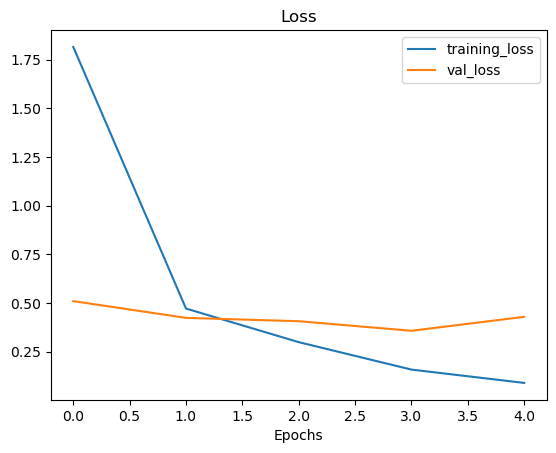

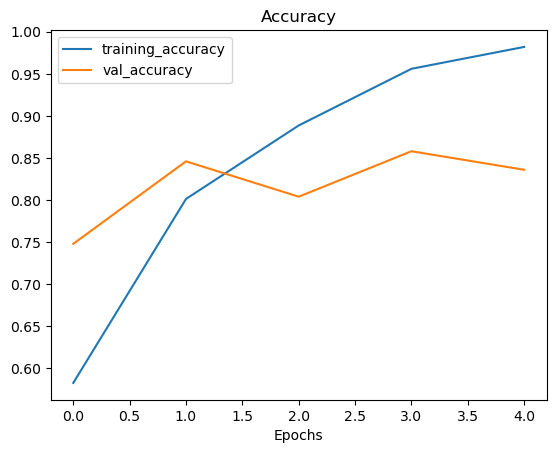

In [25]:
plot_loss_curves(history_four)

In [26]:
history_df(history_four)

,loss,accuracy,val_loss,val_accuracy
0,1.816097,0.582667,0.509118,0.748
1,0.470905,0.801333,0.423029,0.846
2,0.298221,0.888667,0.405852,0.804
3,0.157090,0.956000,0.356670,0.858
4,0.088567,0.982000,0.428379,0.836


In [27]:
# improving our baseline model
model_five = Sequential([
    Conv2D(filters=16,kernel_size = (3,3),padding="valid",activation="relu"),
    MaxPool2D(pool_size=(2,2)),
    Conv2D(filters=16,kernel_size = (3,3),padding="valid",activation="relu"),
    MaxPool2D(pool_size=(2,2)),
    Conv2D(filters=16,kernel_size = (3,3),padding="valid",activation="relu"),
    MaxPool2D(pool_size=(2,2)),
    Flatten(),
    Dense(units = 1,activation="sigmoid")
])
model_five.compile(loss="binary_crossentropy",optimizer="adam",metrics=["accuracy"])
history_five = model_five.fit(train_data,epochs=5,
                              steps_per_epoch=len(train_data),
                              validation_data = valid_data,
                              validation_steps=len(valid_data))

Epoch 1/5


2023-12-09 23:56:09.756112: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_0' with dtype int32
	 [[{{node Placeholder/_0}}]]


47/47 [==============================] - ETA: 0s - loss: 0.5858 - accuracy: 0.7007

2023-12-09 23:56:17.075897: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_0' with dtype int32
	 [[{{node Placeholder/_0}}]]


47/47 [==============================] - 8s 176ms/step - loss: 0.5858 - accuracy: 0.7007 - val_loss: 0.4183 - val_accuracy: 0.8200
Epoch 2/5
47/47 [==============================] - 8s 172ms/step - loss: 0.4514 - accuracy: 0.7980 - val_loss: 0.4122 - val_accuracy: 0.8300
Epoch 3/5
47/47 [==============================] - 8s 176ms/step - loss: 0.4117 - accuracy: 0.8267 - val_loss: 0.3540 - val_accuracy: 0.8440
Epoch 4/5
47/47 [==============================] - 8s 176ms/step - loss: 0.3899 - accuracy: 0.8407 - val_loss: 0.3230 - val_accuracy: 0.8700
Epoch 5/5
47/47 [==============================] - 8s 179ms/step - loss: 0.3578 - accuracy: 0.8547 - val_loss: 0.4039 - val_accuracy: 0.8140


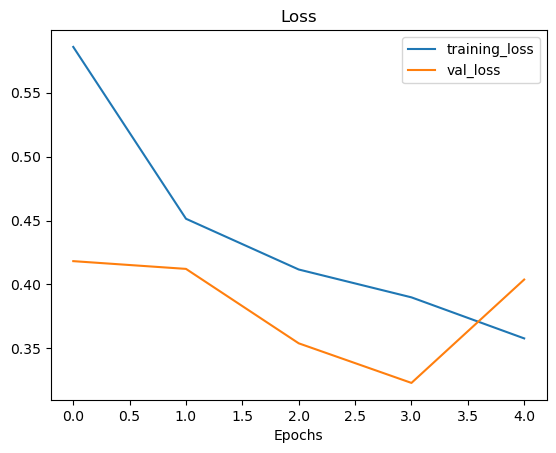

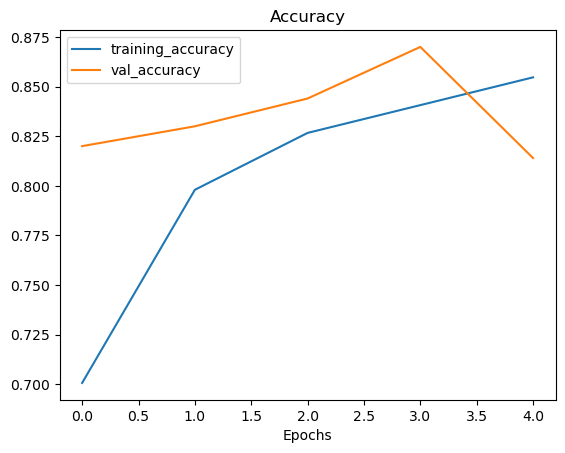

In [28]:
plot_loss_curves(history_five)

In [29]:
history_df(history_five)

,loss,accuracy,val_loss,val_accuracy
0,0.585825,0.700667,0.418263,0.820
1,0.451412,0.798000,0.412204,0.830
2,0.411728,0.826667,0.353990,0.844
3,0.389939,0.840667,0.323012,0.870
4,0.357836,0.854667,0.403862,0.814


In [33]:
class ImprovedBaseline:
    def __init__(self,train_data,test_data):
        self.train_data = train_data
        self.test_data = test_data
        self.epochs = 5
        self.model = self.build_model()
        self.compile_model()
        self.history = self.train_model()

    def build_model(self):
        model = Sequential([
            Conv2D(filters=16, kernel_size=(3, 3), padding="valid", activation="relu"),
            MaxPool2D(pool_size=(2, 2)),
            Conv2D(filters=16, kernel_size=(3, 3), padding="valid", activation="relu"),
            MaxPool2D(pool_size=(2, 2)),
            Conv2D(filters=16, kernel_size=(3, 3), padding="valid", activation="relu"),
            MaxPool2D(pool_size=(2, 2)),
            Flatten(),
            Dense(units=1, activation="sigmoid")
        ])
        return model

    def compile_model(self):
        self.model.compile(loss="binary_crossentropy", optimizer="adam", metrics=["accuracy"])

    def train_model(self):
        history = self.model.fit(self.train_data, epochs=self.epochs,
                                 steps_per_epoch=len(self.train_data),
                                 validation_data=self.test_data,
                                 validation_steps=len(self.test_data))
        return history
        
    def plot_loss_curves(self):
      """
      Returns separate loss curves for training and validation metrics.
      """ 
      loss = self.history.history['loss']
      val_loss = self.history.history['val_loss']
    
      accuracy = self.history.history['accuracy']
      val_accuracy = self.history.history['val_accuracy']
    
      epochs = range(len(self.history.history['loss']))
    
      # Plot loss
      plt.plot(epochs, loss, label='training_loss')
      plt.plot(epochs, val_loss, label='val_loss')
      plt.title('Loss')
      plt.xlabel('Epochs')
      plt.legend()
    
      # Plot accuracy
      plt.figure()
      plt.plot(epochs, accuracy, label='training_accuracy')
      plt.plot(epochs, val_accuracy, label='val_accuracy')
      plt.title('Accuracy')
      plt.xlabel('Epochs')
      plt.legend();  
    def history_df(self):
        return pd.DataFrame(self.history.history)

In [34]:
model_six = ImprovedBaseline(train_data,valid_data)


Epoch 1/5


2023-12-10 00:02:01.899583: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_0' with dtype int32
	 [[{{node Placeholder/_0}}]]


47/47 [==============================] - ETA: 0s - loss: 0.6153 - accuracy: 0.6940

2023-12-10 00:02:09.435616: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_0' with dtype int32
	 [[{{node Placeholder/_0}}]]


47/47 [==============================] - 9s 180ms/step - loss: 0.6153 - accuracy: 0.6940 - val_loss: 0.5074 - val_accuracy: 0.7920
Epoch 2/5
47/47 [==============================] - 8s 172ms/step - loss: 0.4732 - accuracy: 0.7960 - val_loss: 0.3931 - val_accuracy: 0.8360
Epoch 3/5
47/47 [==============================] - 8s 174ms/step - loss: 0.4206 - accuracy: 0.8100 - val_loss: 0.3531 - val_accuracy: 0.8480
Epoch 4/5
47/47 [==============================] - 8s 168ms/step - loss: 0.3866 - accuracy: 0.8327 - val_loss: 0.3436 - val_accuracy: 0.8560
Epoch 5/5
47/47 [==============================] - 8s 171ms/step - loss: 0.3590 - accuracy: 0.8433 - val_loss: 0.4487 - val_accuracy: 0.7700


In [35]:
model_six.history_df()

,loss,accuracy,val_loss,val_accuracy
0,0.615286,0.694000,0.507383,0.792
1,0.473174,0.796000,0.393072,0.836
2,0.420644,0.810000,0.353116,0.848
3,0.386565,0.832667,0.343623,0.856
4,0.358962,0.843333,0.448701,0.770


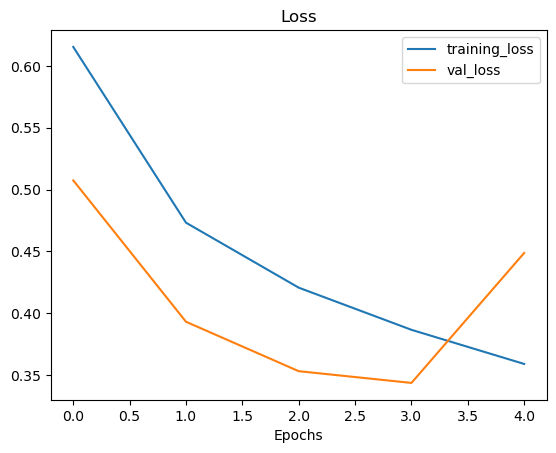

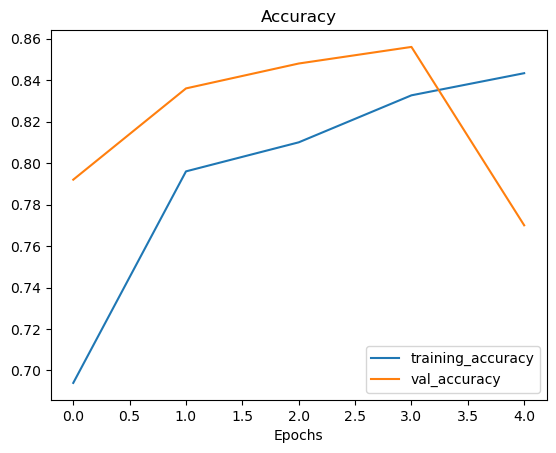

In [36]:
model_six.plot_loss_curves()

#### Data Augmentation

In [ ]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [ ]:
train_datagen_aug = ImageDataGenerator(
    rescale=1/255.,
    rotation_range = 20,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest',
    featurewise_center=True,
    featurewise_std_normalization=True,
)
test_datagen = ImageDataGenerator(
    rescale=1/255.
)
train_datagen = ImageDataGenerator(
    rescale=1/255.
)

train_data_aug = train_datagen_aug.flow_from_directory(train_dir,target_size=(224, 224),
                                                        batch_size=32,
                                                        class_mode='binary',
                                                        shuffle=False) 

train_data = train_datagen.flow_from_directory(train_dir,
                                               target_size=(224, 224),
                                               batch_size=32,
                                               class_mode='binary',
                                               shuffle=False) # Don't shuffle for demonstration purposes
test_data = test_datagen.flow_from_directory(test_dir,
                                             target_size=(224, 224),
                                             batch_size=32,
                                             class_mode='binary')

In [ ]:
augmented_images,_ = train_data_aug.next()
images,labels =train_data.next()

In [ ]:
random_number = random.randint(0, 31) # we're making batches of size 32, so we'll get a random instance
plt.imshow(images[random_number])
plt.title(f"Original image")
plt.axis(False)
plt.figure()
plt.imshow(augmented_images[random_number])
plt.title(f"Augmented image")
plt.axis(False);

Fitting the same model in the augmented data

In [ ]:
model_six = ImprovedBaseline(train_data = train_data,test_data= test_data)
model_six.train_model()